<a href="https://colab.research.google.com/github/Kriszti8828/6het/blob/mergel/beadando_maxmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Package-ek importálása

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import scipy

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Adatbázisok importálása, tisztítás

In [4]:
#Adatbázisok importálása
df_dbe=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/DBE.csv') #DBE
df_pbj=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/PBJ.csv') #PBJ
df_xlb=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/XLB.csv') #XLB
df_bil=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/BIL.csv') #BIl
df_qqq=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/QQQ.csv') #QQQ


In [5]:
#YC importálása
df_yc=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/DGS3MO.csv')
#df_yc.head()
#az értelmezhetetlen karakter eliminációja, számmá alakítás
df_yc['DGS3MO']=df_yc['DGS3MO'].replace('.',10000).astype(float)
df_yc['DGS3MO']=df_yc['DGS3MO'].astype(float)

#És a nagy szám helyett a két szomszédos elem átlagának a beírása
for i in range(len(df_yc)):
  if df_yc['DGS3MO'][i]==10000:
    df_yc['DGS3MO'][i]=(df_yc['DGS3MO'][i-1]+df_yc['DGS3MO'][i+1])/2
  if df_yc['DGS3MO'][i]==0:
    df_yc['DGS3MO'][i]==df_yc['DGS3MO'][i-1]




<ipython-input-5-2226c5596487>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yc['DGS3MO'][i]=(df_yc['DGS3MO'][i-1]+df_yc['DGS3MO'][i+1])/2


In [6]:
#A megfelelő hozamok közö dataframebe illesztése
#Az üres df. létrehozása
df_hozam=pd.DataFrame(columns={'Date','dbe','pbj','xlb','bil','qqq','yc'})
#Feltöltés a dátummal
df_hozam['Date']=df_qqq['Date'].copy()

In [7]:
#Feltöltés az ETF-ek adj. close adatával
df_hozam['dbe']=df_dbe['Adj Close'].copy()
df_hozam['pbj']=df_pbj['Adj Close'].copy()
df_hozam['xlb']=df_xlb['Adj Close'].copy()
df_hozam['bil']=df_bil['Adj Close'].copy()
df_hozam['qqq']=df_qqq['Adj Close'].copy()

#és a hozamgörbével
df_hozam['yc']=df_yc['DGS3MO'].copy()


In [8]:
#A dátum szerint indexelünk
df_hozam=df_hozam.set_index('Date')
df_hozam.index = pd.to_datetime(df_hozam.index)

In [9]:
#Ellenőrzés
df_hozam.head(20)

,bil,yc,xlb,pbj,dbe,qqq
Date,,,,,,
2008-01-02,85.052963,3.260,29.851694,13.911901,34.557426,44.299957
2008-01-03,84.997299,3.240,30.393787,13.920213,34.330193,44.484505
2008-01-04,84.978714,3.200,29.475840,13.595911,34.140842,42.533573
2008-01-07,85.052963,3.270,29.071068,13.845374,33.336082,42.331459
2008-01-08,84.997299,3.250,28.622932,13.687383,33.610649,41.232960
2008-01-09,84.941589,3.220,28.803635,13.803798,33.307674,42.111755
2008-01-10,84.978714,3.240,29.193937,14.011689,32.947899,42.173275
2008-01-11,85.015854,3.090,28.897604,13.654121,32.559715,41.347191
2008-01-14,85.090065,3.190,29.866159,13.670752,33.165657,42.067822


In [10]:
#a hozam kiszámítása
df_ret=pd.DataFrame(columns={'dbe','pbj','xlb','bil','qqq','yc'})
df_ret['dbe']=df_hozam['dbe']/df_hozam['dbe'].shift(1)-1
df_ret['pbj']=df_hozam['pbj']/df_hozam['pbj'].shift(1)-1
df_ret['xlb']=df_hozam['xlb']/df_hozam['xlb'].shift(1)-1
df_ret['bil']=df_hozam['bil']/df_hozam['bil'].shift(1)-1
df_ret['qqq']=df_hozam['qqq']/df_hozam['qqq'].shift(1)-1
df_ret['yc']=(df_hozam['yc']+1)/(df_hozam['yc']+1).shift(1)-1


In [11]:
#A dátum szerint indexelünk
df_ret.index = pd.to_datetime(df_ret.index)

In [12]:
#Ellenőrzés
df_ret.head(10)

,bil,yc,xlb,pbj,dbe,qqq
Date,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,-0.000654,-0.004695,0.018160,0.000597,-0.006576,0.004166
2008-01-04,-0.000219,-0.009434,-0.030202,-0.023297,-0.005516,-0.043856
2008-01-07,0.000874,0.016667,-0.013732,0.018348,-0.023572,-0.004752
2008-01-08,-0.000654,-0.004684,-0.015415,-0.011411,0.008236,-0.025950
2008-01-09,-0.000655,-0.007059,0.006313,0.008505,-0.009014,0.021313
2008-01-10,0.000437,0.004739,0.013550,0.015060,-0.010802,0.001461
2008-01-11,0.000437,-0.035377,-0.010150,-0.025519,-0.011782,-0.019588
2008-01-14,0.000873,0.024450,0.033517,0.001218,0.018610,0.017429


In [13]:
#A hozamgörbe manipulálása
from math import nan
#df_ret['yc'].plot()
for i in range(len(df_ret['yc'])):
  if df_ret['yc'][i]==np.NaN:
    df_ret['yc'][i]=0
  if df_ret['yc'][i]<-100:
    df_ret['yc'][i]=0
  if df_ret['yc'][i]>100:
    df_ret['yc'][i]=0

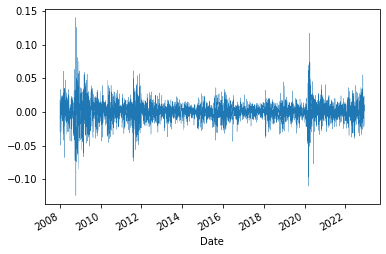

In [14]:
#Ellenőző plot az etf-ekhez
df_ret['xlb'].plot(linewidth=0.3)

In [15]:
print(df_ret['yc'][0:252*5].mean()*252)

-0.12107720415312563


In [16]:
#A végtelen és a 0 adatok kezelése
df_ret=df_ret.replace(np.inf,np.nan).astype(float)

In [17]:
#Az yc nélküli hozamok, adatbázis
df_hozam2=df_hozam.copy()
#df_hozam2.head()
df_hozam2=df_hozam2.drop(['yc'], axis=1)
df_hozam_gsh=df_hozam2.copy() #Adatbázis a globális Sharpe-rátához
df_hozam_lsh=df_hozam2.copy() #Adatbázis a csúszóablakos Sharpe-rátához

###Sharpe ráta, globális

#####A 10-11. órán felépített kódokat használva:

In [18]:
def minden(price_df,w):
  return_asset = price_df/price_df.shift(1)-1
  mean_asset = return_asset.mean() * 252       #évestett átlag
  std_asset = return_asset.std() * np.sqrt(252)  #évesített szórás
  cov_asset = return_asset.cov() * 252
  corr_asset = return_asset.corr()

#Itt jön be a calc nasset mean és cov

  #N eszköz átlagos hozama, a megfelelő súlyokkal
  calc_nasset_mean=np.sum(w*mean_asset)    #2 vektor elemenkénti szorzata --> összeadjuk

  #n eszköz kovarianciája a megfelelő súlyokkal
  calc_nasset_cov=np.sqrt(np.dot(np.dot(w,cov_asset), w.transpose()))   #np.dot  mátrix szorzat

  #A return és a szórás meghatározása
  ret = calc_nasset_mean
  std = calc_nasset_cov
  #Kockázatmentes hozamgörbe  
  
 
  return ret, std


In [19]:
ww=np.array([0,0,0,1,0])
#A fenti függvény behívása
rreturn, standev =minden(df_hozam_gsh, ww)


In [20]:
#Teszt, vektorok
print(rreturn)
print(standev)
print(rreturn/standev)

0.012790644955354324
0.28684279735632917
0.04459113170432933


In [21]:
#Kockázatmentes hozam
kockment=(df_ret['yc']).mean()*252

#####Optimalizálás

In [33]:
#A célfüggvény
def elsoopt(ww):
  a1,a2=minden(df_hozam_gsh,ww)
  Sh_rate=(a1-kockment)/a2
  return Sh_rate


In [23]:
fun1 = lambda x: 100-elsoopt(x) #ide proba(x) is jöhet tesztelni

In [24]:
bounds=((0,None),(0,None),(0,None),(0,None),(0,None))
cons=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1})

In [25]:
#Az optimalizálás (~3 min volt nekem)
megoldas1_1=scipy.optimize.minimize(fun1, (0.5,0.2,0.1,0.0,0), method='SLSQP',
                        bounds=bounds,
                        constraints=cons)

In [26]:
#Az optimalizálás eredménye
print(megoldas1_1)

     fun: 99.4033740990157
     jac: array([-0.02531147,  0.09346008, -0.07809734,  0.22012138, -0.07815456])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.14581519e-18, 0.00000000e+00, 2.25732606e-01, 1.60570313e-17,
       7.74267394e-01])


In [30]:
#És az eredménnyel számolt hozam
rreturn, standev=minden(df_hozam_gsh,megoldas1_1['x'])
#A kapott Sharpe-ráta
print((rreturn-0.01)/standev)
#A kapott súlyok
print(np.round(megoldas1_1['x'],3))
#Ellenőrzés: az öszeg valóban 1
print(sum(megoldas1_1['x']))
#A kapott hozam
print(elsoopt(megoldas1_1['x']))

0.6263418359194598
[0.    0.    0.226 0.    0.774]
1.0
0.5966259009842957


##Csúszóablakos Shapre ráta


In [28]:
def masodikopt(start,stop): #A fenti függvény általánosítása az időablakokhoz
#  start=5
#  stop=25
  megoldas1_1=[]
  
  for i in range(start,stop):
    
    kockment=(df_ret['yc'][(start+i):(start+i+5*252)]).mean()*252 #évesített, 5 éves ablakot néz
    def celfv(ww):
        a1,a2=minden(df_hozam_gsh[i:(i+5*252)],ww)
        Sh_rate=(a1-kockment)/a2      
        return Sh_rate

    funa = lambda x: 100-celfv(x) #max: Szám-x akkor min., ha x max.
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None))
    cons=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1})

    megoldas1_a=scipy.optimize.minimize(funa, (0.5,0.2,0.1,0.0,0), method='SLSQP',
                          bounds=bounds,
                          constraints=cons)
    megoldas1_1.append(megoldas1_a['x'])
  #for i in len(megolda)
  return megoldas1_1

In [ ]:
tesztsok=masodikopt(1,len(df_hozam2['bil']-5*252-1)) #A LE NE FUTTASD! #A futásidő ~8 perc
#print(tesztsok)
print(df_hozam_gsh.head(4))

In [ ]:
megoldas1_2=pd.DataFrame(columns={'x1','x2','x3','x4','x5'}) #A kapott megoldás táblázattá alakítása
megoldas1_2['x1']=np.zeros(len(tesztsok))
megoldas1_2['x2']=np.zeros(len(tesztsok))
megoldas1_2['x3']=np.zeros(len(tesztsok))
megoldas1_2['x4']=np.zeros(len(tesztsok))
megoldas1_2['x5']=np.zeros(len(tesztsok))
for i in range(len(tesztsok)):
  megoldas1_2['x1'][i]=tesztsok[i][0]
  megoldas1_2['x2'][i]=tesztsok[i][1]
  megoldas1_2['x3'][i]=tesztsok[i][2]
  megoldas1_2['x4'][i]=tesztsok[i][3]
  megoldas1_2['x5'][i]=tesztsok[i][4]

In [ ]:
#Az eredmények csv-re mentése:
with open('megoldas1_2.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(megoldas1_2)
print(megoldas1_2)

In [ ]:
megoldas1_2=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/megoldas1_2.csv') #Hogy ne kelljen mindig újrafuttatni, itt a korábban megkapott optimumot hívjuk be
print(megoldas1_2)


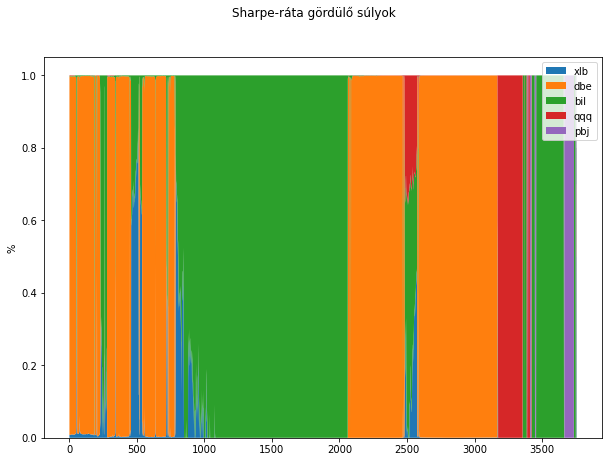

In [41]:
#Ábrázolás: Sharpe-ráta optimalizálással gördülő súlyok
ay = megoldas1_2['x1'] #pbj
by = megoldas1_2['x2'] #dbe
cy = megoldas1_2['x3'] #xlb
dy = megoldas1_2['x4'] #qqq
ey = megoldas1_2['x5'] #bil
y = np.vstack([ay, by, cy,dy,ey])
sulyok=np.array([ay, by, cy,dy,ey])
# plot
fig, ax = plt.subplots(figsize=(10,7))
x=df_bil['Date'][0:len(ay)]
plt.xlim=(x)
ax.stackplot(megoldas1_2.index, y)
plt.legend(['xlb','dbe','bil','qqq','pbj'])
plt.suptitle('Sharpe-ráta gördülő súlyok')
plt.ylabel('%')
plt.savefig("gordulosharpe.png") 
plt.show()

In [42]:
###################Returnök kiszámítása

In [43]:
#Returnök visszaadása: üres adatbázis létrehozása
gordreturn=pd.DataFrame(columns={'return'})
gordreturn['return']=np.zeros(len(sulyok[0]))

In [44]:
#Ellenőrzés
df_ret.head(3)

,bil,yc,xlb,pbj,dbe,qqq
Date,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,-0.000654,-0.004695,0.018160,0.000597,-0.006576,0.004166
2008-01-04,-0.000219,-0.009434,-0.030202,-0.023297,-0.005516,-0.043856


In [45]:
#A súlyfüggvények
print(sulyok)

[[8.02186930e-03 8.01746895e-03 8.08082763e-03 ... 2.36231590e-11
  5.00000000e-01 5.00000000e-01]
 [9.89223014e-01 9.89116242e-01 9.89108529e-01 ... 0.00000000e+00
  2.00000000e-01 2.00000000e-01]
 [1.28726317e-03 1.43798738e-03 1.40727635e-03 ... 0.00000000e+00
  1.00000000e-01 1.00000000e-01]
 [1.46785396e-03 1.42830205e-03 1.40336734e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.72409812e-13 1.09212277e-13 5.03130034e-14 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [46]:
#A súlyfüggvények np. array-é alakítása, mert így tud lefutni a 'minden' kód
df_suly1_2=megoldas1_2[['x1','x2','x3','x4','x5']]
sulyarray=[]

for i in range(len(df_suly1_2['x1'])):
  sulyarray.append([])
  for j in range(5):
    sulyarray[i].append(df_suly1_2[df_suly1_2.columns[j]][i])
  sulyarray[i]=np.array(sulyarray[i])

In [47]:
#Ellenőrzés: valóban np. array
print(type(sulyarray[1]))

<class 'numpy.ndarray'>


In [48]:
#A returnök kiszámolása a csúszóablakos módszernél
gordreturn['return']=np.zeros(len(megoldas1_2['x1']))
gordreturn['szoras']=np.zeros(len(megoldas1_2['x1']))

for i in range(len(megoldas1_2['x1'])):  
  gordreturn['return'][i]=minden(df_hozam_gsh[i:(i+5*252)],sulyarray[i])[0]
  gordreturn['szoras'][i]=minden(df_hozam_gsh[i:(i+5*252)],sulyarray[i])[1] #a return és a szórás oszlopok feltöltése a korábban bemutatott függvénnyel

  #df_ret[df_ret.columns[1]]*megoldas1_2['x1'][i] #pbj #az index 1-nél indul, mert a 0. az yc
  

In [49]:
#Dátum hozzáadása
gordreturn['Date']=df_bil['Date'][0:len(gordreturn['return'])]
print(gordreturn.head(4))
gordreturn=gordreturn.set_index('Date')
gordreturn.index = pd.to_datetime(gordreturn.index)

     return    szoras        Date
0  0.063238  0.321643  2008-01-02
1  0.058207  0.321543  2008-01-03
2  0.066630  0.321293  2008-01-04
3  0.068946  0.321238  2008-01-07


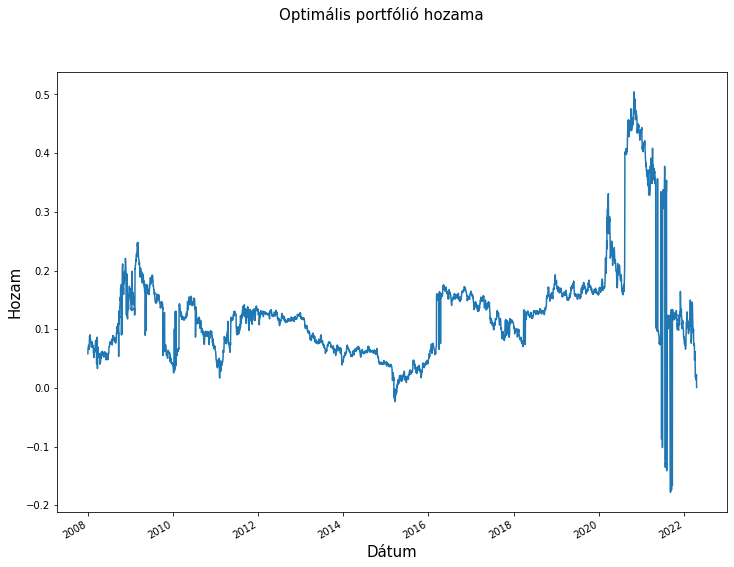

In [195]:
#A csúszóablakos optimális returnök ábrázolása

plt.figure(figsize=(12, 9))
gordreturn['return'][1:3600].plot()
plt.suptitle('Optimális portfólió hozama', fontsize=15)
plt.ylabel('Hozam', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("sharpegordhozam.png") 
plt.show()

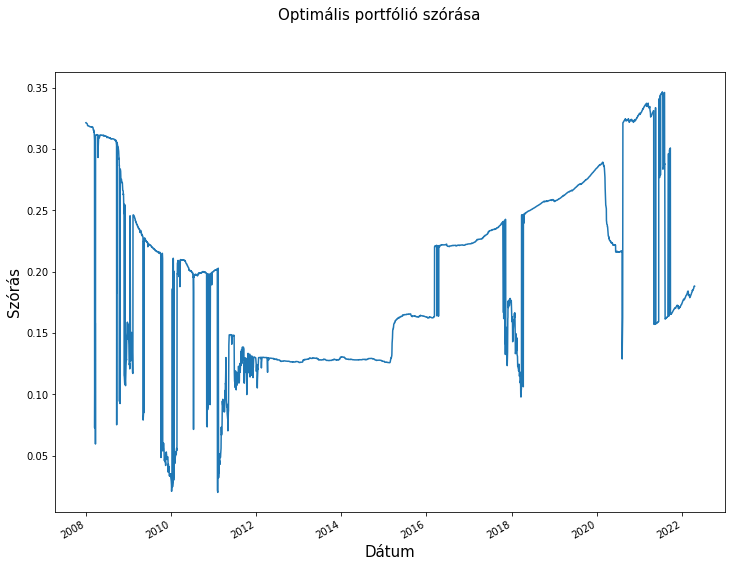

In [196]:
#A csúszóablakos optimális szórások ábrázolása
#Az alacsony hozam mellett alacsony szórás van
plt.figure(figsize=(12, 9))
gordreturn['szoras'][1:3600].plot() 
plt.suptitle('Optimális portfólió szórása', fontsize=15)
plt.ylabel('Szórás', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("sharpegordszoras.png") 
plt.show()

In [52]:
#minden(df_hozam_gsh[1:(1+5*252)],df_suly1_2[1:(1+1)])
minden(df_hozam_gsh,np.array([1,0,0,0,0]))

(0.00487529085580334, 0.004979813351040106)

##Maximum drawdown minimalizálása

###Adatbázis kialakítása

#####A fentiektől eltérően itt naponta kell hozamot vizsgálni (a min. max. drawdownhoz), így új függvények és adatbázisok szükségesek

In [126]:
#Súlyok
w=[0,1,0,0,0]

In [ ]:
print(df_hozam2)

In [ ]:
#Létrehozunk egy eredmény oszlopot a súlyokkal számolt returnhöz
df_hozam2['eredmeny']=0
print(df_hozam2['eredmeny'])

In [129]:
#Feltöltjük
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['dbe']*w[0]
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['qqq']*w[1]
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['pbj']*w[2]
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['xlb']*w[3]
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['bil']*w[4]


In [130]:
#2. lehetőség: for ciklust írunk rá
df_hozam3=pd.DataFrame(columns={'eredmeny'})
df_hozam3['eredmeny']=df_hozam2['eredmeny'].copy()
df_hozam3['eredmeny']=0
print(df_hozam3.head(5))

            eredmeny
Date                
2008-01-02         0
2008-01-03         0
2008-01-04         0
2008-01-07         0
2008-01-08         0


In [ ]:
#Feltöltjük a skalárszorzatokkal
for i in range(len(df_hozam2.columns)-2):
  df_hozam3['eredmeny']=df_hozam3['eredmeny']+df_ret[df_hozam2.columns[i]]*w[i]

print(df_hozam3['eredmeny'])

In [ ]:
#Teszt
print(df_hozam2['eredmeny'])

In [133]:
#A portfólió hozamának a kiszámítása
df_hozam2['return']=np.zeros
df_hozam2['return'][0]=1

df_hozam2['return']=df_hozam2['eredmeny']
df_hozam2['return'][0]=1
df_hozam2['return'][1]=df_hozam2['return'][0]*(1+df_hozam2['eredmeny'][1])



for i in range(len(df_hozam2['eredmeny'])-1):
  df_hozam2['return'][i+1]=(df_hozam2['eredmeny'][i+1]+1)*df_hozam2['return'][i]

<ipython-input-133-abbf480cf5d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hozam2['return'][0]=1


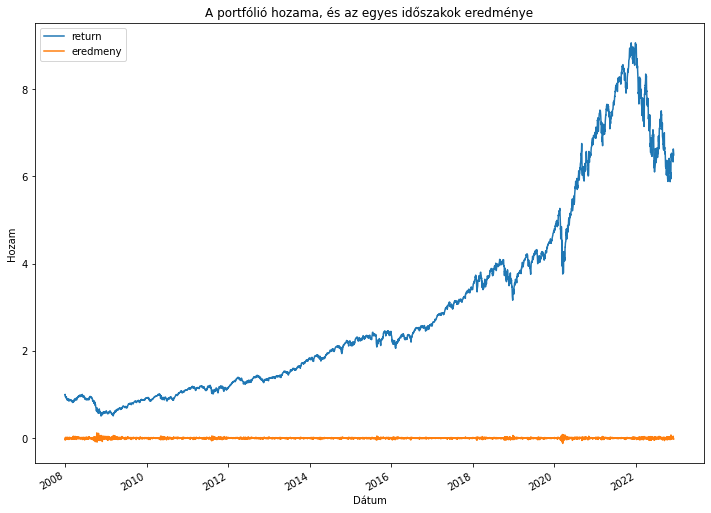

In [156]:
#Ellenőrzések
#print(df_hozam2['return'],df_hozam2['eredmeny'])
#df_hozam2[['eredmeny','return']].plot()
df_hozam2[['return','eredmeny']].plot(title="A portfólió hozama, és az egyes időszakok eredménye",figsize=(12, 9))
plt.ylabel('Hozam')
plt.xlabel('Dátum')
plt.show()

In [135]:
def hozamdf(df1,df2, ww): #a súlyok segítségével naponta számol hozamot, df1 a hozam, df2 a return értékek adatbázisa

  adatsor=df1.copy() #így annyi sorból áll, mint az eredeti df
  adatsor['eredmeny']=0
  for i in range(len(df1.columns)-2):
    adatsor['eredmeny']=adatsor['eredmeny']+df2[df1.columns[i]]*ww[i] #a súlyokkal súlyozunk, hogy megfelelő legyen a hozam


  adatsor['return']=np.zeros
  adatsor['return'][0]=1
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot

  for i in range(len(adatsor['eredmeny'])-1):
    adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]

  return adatsor['return']

<ipython-input-135-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-135-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-135-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


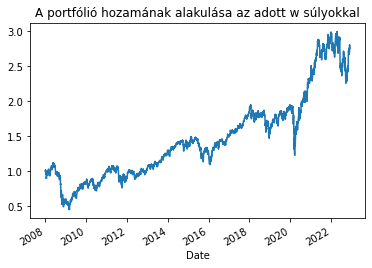

In [136]:
#Ellenőrzés
qq=hozamdf(df_hozam2,df_ret,w)
#print(qq.head(-5))
fig=qq.plot(title="A portfólió hozamának alakulása az adott w súlyokkal",
            )
#fig.legend="return"

plt.show(fig)

In [137]:
def maxmin(ww): #Ez a függvény számolja ki a drawdown mértékét (a minimalizáláshoz is ezt fogjuk használni)
  qq=hozamdf(df_hozam2,df_ret,ww)
  kicsi=min(qq)
  a=0 
  for i in qq:
    a=a+1
    if i == kicsi: 
      break
  nagy=0
  for j in range(0,a):
    if qq[j]>nagy:
      nagy=qq[j]
  return (nagy-kicsi)/nagy


In [138]:
#Ellenőrzés
drawd=maxmin(w)
print(drawd)


<ipython-input-135-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-135-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-135-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


0.5982482346449063


####Optimalizálás

In [139]:
#Szükséges package-ek importálása
import seaborn as sns

import scipy

In [140]:
#Egy egyszerűen ellenőrizhető példafüggvény
def proba(ww):
  return ww[0]/ww[1]+ww[2]+ww[3]+ww[4]

In [141]:
#Az optimalizálandó függvény
fun3 = lambda x: maxmin(x) #ide proba(x) is jöhet tesztelni

In [142]:
#Határok és korlátok
bounds=((0,None),(0,None),(0,None),(0,None),(0,None))
cons=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1})

In [161]:
#Az optimalizálás (~3 min volt nekem)
megoldas3=scipy.optimize.minimize(fun3, (0.1,0.1,0.1,0.1,0.6), method='SLSQP',
                        bounds=bounds,
                        constraints=cons)

<ipython-input-135-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-135-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-135-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


In [159]:
#Az eredmény
print(megoldas3)
#Súlyok:
print(np.round(megoldas3['x'],3))

     fun: 0.0013094664321101623
     jac: array([0.00130966, 0.03481957, 0.00727025, 0.03637855, 0.04902092])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.00000000e+00, 8.32667268e-17, 2.22044605e-16, 0.00000000e+00,
       0.00000000e+00])
[1. 0. 0. 0. 0.]


In [145]:
#Ellenzőrzés
sum(megoldas3['x'])

1.0000000000000002

In [146]:
#És a portfólió alakulása az időben
drawd=maxmin(megoldas3['x'])
print(drawd)

<ipython-input-135-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-135-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-135-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


0.0013094664321101623


In [147]:
qq=hozamdf(df_hozam2,df_ret,megoldas3['x'])
#print(qq.head(-5))
#qq.plot()
print(min(qq))

<ipython-input-135-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-135-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-135-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


0.9986905335678898


####Optimalizálás más feltételekkel

In [148]:
#A cél az volt, hogy kisebb súlyt adjunk az 1. ETF-nek, amit szint kizárólagosan "választ" az optimalizáló függvény
cons2=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1},
       {'type': 'ineq', 'fun': lambda ww: ww[1]-0.05})

In [149]:
#Az optimalizálás (~3 min volt nekem)
megoldas3b=scipy.optimize.minimize(fun3, (0.1,0.1,0.1,0.1,0.6), method='SLSQP',
                        bounds=bounds,
                        constraints=cons2)

<ipython-input-135-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-135-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-135-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


In [167]:
print(megoldas3b)
print(np.round(megoldas3b['x'],3))
drawd=maxmin(megoldas3b['x'])
print(drawd)

     fun: 0.030775282573277957
     jac: array([0.00234628, 0.56642962, 0.28087093, 0.66058376, 0.33893752])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([9.50000000e-01, 5.00000000e-02, 0.00000000e+00, 1.38777878e-17,
       0.00000000e+00])
[0.95 0.05 0.   0.   0.  ]


<ipython-input-135-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-135-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-135-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


0.030775282573277957


###Minmax csúszóablakosan

In [200]:
def negyedikopt(start,stop): #Az optimalizáló függvény, csúszóablakokra alkalmazva a fenti hozamdf függvényt
#  start=5
#  stop=25
  megoldas1_1=[]
  
  for k in range(start,stop): #kezdeti és végső érték: ezek között indul az ablak
    
    def maxmin(ww):
      qq=hozamdf(df_hozam2[(start+k):(start+5*252+k)],df_ret,ww) #Hozamdf
      kicsi=min(qq)
      a=0 
      for i in qq:
        a=a+1
        if i == kicsi: 
          break
      nagy=0
      for j in range(0,a):
        if qq[j]>nagy:
          nagy=qq[j]
      return (nagy-kicsi)/nagy
    
    funa = lambda x: maxmin(x) #A célfüggvény
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None))
    cons=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1})

    megoldas1_a=scipy.optimize.minimize(funa, (0.5,0.2,0.1,0.0,0), method='SLSQP',
                          bounds=bounds,
                          constraints=cons)
    megoldas1_1.append(megoldas1_a['x'])
  #for i in len(megolda)
  return megoldas1_1

In [201]:
#teszt4=negyedikopt(200,250) #Ez így is 50 percig fut, ezért nem futtattuk le a teljes adatbázisra

In [202]:
#print(teszt4)


In [ ]:
#A megoldások kimentése
megoldas3_2=pd.DataFrame(columns={'x1','x2','x3','x4','x5'})
megoldas3_2['x1']=np.zeros(len(tesztsok))
megoldas3_2['x2']=np.zeros(len(tesztsok))
megoldas3_2['x3']=np.zeros(len(tesztsok))
megoldas3_2['x4']=np.zeros(len(tesztsok))
megoldas3_2['x5']=np.zeros(len(tesztsok))
for i in range(len(tesztsok)):
  megoldas3_2['x1'][i]=tesztsok[i][0]
  megoldas3_2['x2'][i]=tesztsok[i][1]
  megoldas3_2['x3'][i]=tesztsok[i][2]
  megoldas3_2['x4'][i]=tesztsok[i][3]
  megoldas3_2['x5'][i]=tesztsok[i][4]

In [ ]:
#tesztsok cs-ve mentése:
with open('megoldas3_2.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(megoldas3_2)
print(megoldas3_2)

In [ ]:
#Az egyszer lefuttatott, kimentett optimumok behíváa, hogy ne kelljen újrafuttatni
megoldas3_2=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/megoldas3_2.csv')
print(type(megoldas3_2['x3']))

In [ ]:
#x=df_bil['Date']
ay = megoldas3_2['x1']
by = megoldas3_2['x2']
cy = megoldas3_2['x3']
dy = megoldas3_2['x4']
ey = megoldas3_2['x5']
y = np.vstack([ay,  by, cy,dy,ey]) #y = np.vstack([ay, by, cy,dy,ey])

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.stackplot(megoldas3_2.index, y)
plt.legend(['xlb','bil','qqq','pbj','qqq'])
plt.suptitle('Drawdown gördülő súlyok')
plt.ylabel('%')
plt.savefig("gordulodraw.png") 
plt.show()

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/My Drive/numpu4/beadando_etfs/megoldas3_2.csv')  #'/content/drive/My Drive/numpu4/beadando_etfs/DBE.csv'
filepath.parent.mkdir(parents=True, exist_ok=True)  
megoldas3_2.to_csv(filepath)

In [ ]:
############Returnök számolása a csúszóablakokhoz

In [ ]:
df_suly3_2=megoldas3_2[['x1','x2','x3','x4','x5']] #Adatbázis létrehozása a súlyoknak
sulyarray2=[]
for i in range(len(df_suly1_2['x1'])):
  sulyarray2.append([])
  for j in range(5):
    sulyarray2[i].append(df_suly1_2[df_suly1_2.columns[j]][i])
  sulyarray2[i]=np.array(sulyarray[i])

In [ ]:
#Ellenőrzés
print(sulyarray2[1])

In [ ]:
#Üres adatbázis a returnöknek
gordreturn_dd=pd.DataFrame(columns={'return'})
gordreturn_dd['return']=np.zeros(len(df_suly3_2['x1']))

In [ ]:
#A returnök és szórások kiszámolása a csúszóablakos módszernél
gordreturn_dd['return']=np.zeros(len(megoldas3_2['x1']))
gordreturn_dd['szoras']=np.zeros(len(megoldas3_2['x1']))
for i in range(len(megoldas3_2['x1'])):  
  gordreturn_dd['return'][i]=minden(df_hozam_gsh[i:(i+5*252)],sulyarray[i])[0]
  gordreturn_dd['szoras'][i]=minden(df_hozam_gsh[i:(i+5*252)],sulyarray[i])[1] #Itt is átlaghozamokkal ill. szórásokkal számolunk, hogy tudjuk ábrázolni
  #df_ret[df_ret.columns[1]]*megoldas1_2['x1'][i] #pbj #az index 1-nél indul, mert a 0. az yc
  

In [ ]:
#Dátum beállítása
gordreturn_dd['Date']=np.zeros
for i in range(len(gordreturn_dd)):
  gordreturn_dd['Date'][i]=df_bil['Date'][200+i]
print(gordreturn_dd.head(4))
#gordreturn_dd.index = pd.to_datetime(gordreturn_dd.index)

In [ ]:
#Dátum beállítása
gordreturn_dd=gordreturn_dd.set_index('Date')


In [ ]:
plt.figure(figsize=(12, 9))
gordreturn_dd['return'].plot()
plt.suptitle('Optimális portfólió hozama', fontsize=15)
plt.ylabel('Hozam', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("drawgordopthozam.png") 
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
gordreturn_dd['szoras'].plot() #Együtt mozog a kettő, minél kisebb a szórás, annál kisebb a különbség is az egyes elemek között
plt.suptitle('Optimális portfólió szórása', fontsize=15)
plt.ylabel('Hozam', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("drawgordoptszoras.png") 
plt.show()

In [ ]:
#hozamdf(df_hozam2[(start+k):(start+5*252+k)],df_ret,ww)

##Példa a minimalizálásra

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [ ]:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

bnds = ((0, None), (0, None))

cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

res = scipy.optimize.minimize(fun, (2, 0), method='SLSQP', bounds=bnds,
               constraints=cons)

In [ ]:
res

# Ábrák

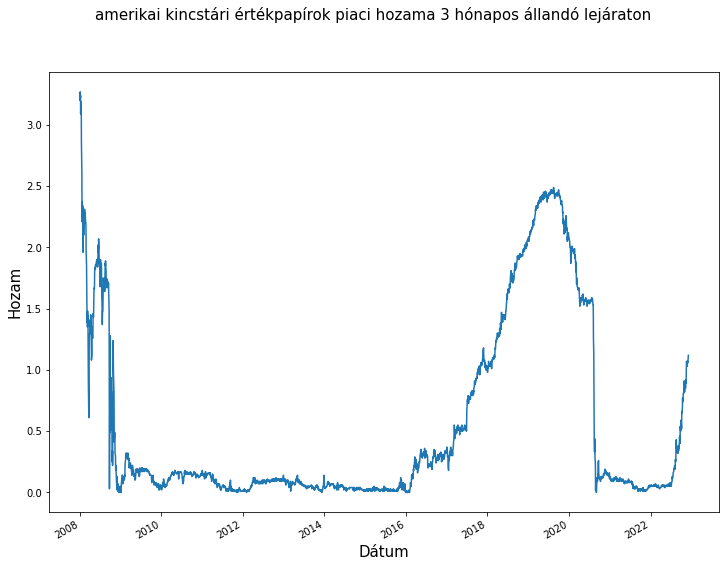

In [193]:
plt.figure(figsize=(12, 9))
plt.suptitle('amerikai kincstári értékpapírok piaci hozama 3 hónapos állandó lejáraton', fontsize=15)
df_hozam['yc'].plot()
plt.ylabel('Hozam', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("yc_hozam.png") 
plt.show()

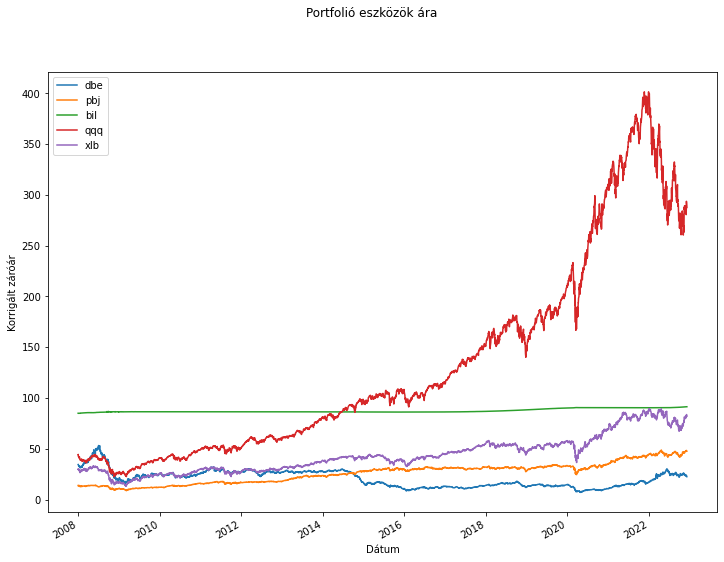

In [187]:
df_hozam.plot( y=['dbe','pbj','bil','qqq', 'xlb'], figsize=(12,9))
plt.suptitle('Portfolió eszközök ára')
plt.ylabel('Korrigált záróár')
plt.xlabel('Dátum')
plt.savefig("assets-adjclose.png") 
plt.show()

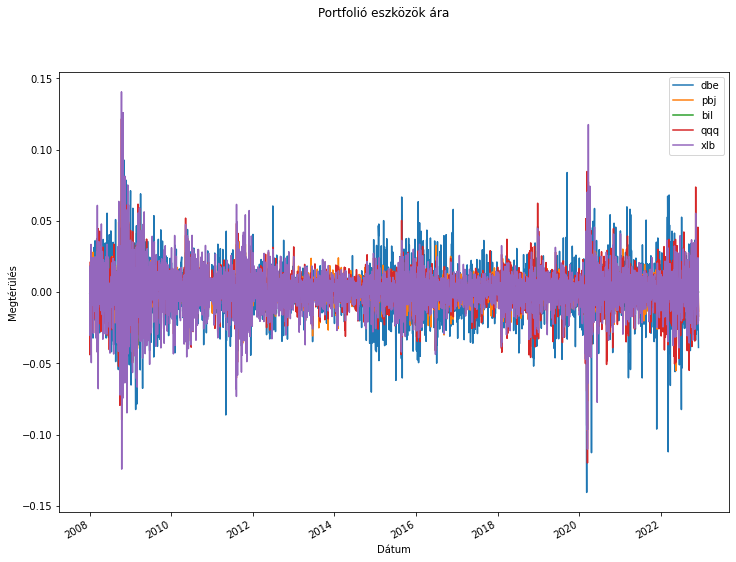

In [188]:
df_ret.head(50)
df_ret.plot( y=['dbe','pbj','bil','qqq', 'xlb'], figsize=(12,9))
plt.suptitle('Portfolió eszközök ára')
plt.ylabel('Megtérülés')
plt.xlabel('Dátum')
plt.savefig("assets-return.png") 
plt.show()


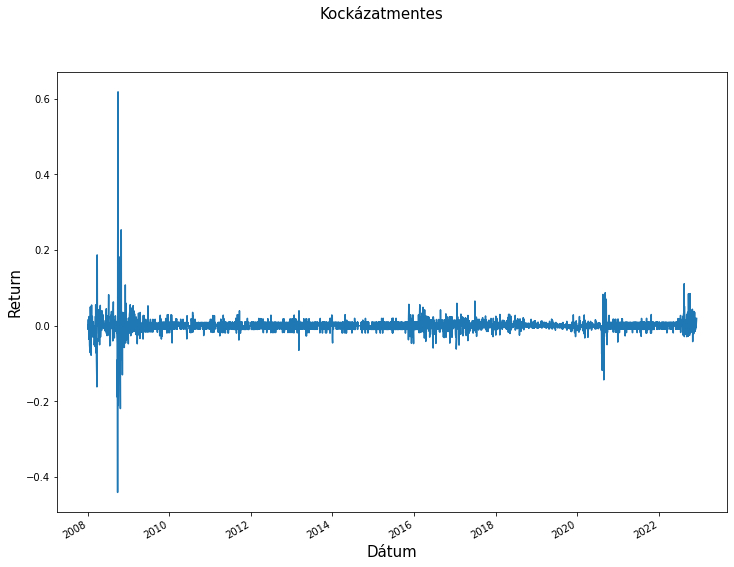

In [199]:
plt.figure(figsize=(12, 9))
plt.suptitle('Kockázatmentes', fontsize=15)
df_ret['yc'].plot()
plt.ylabel('Return', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("yc_return.png") 
plt.show()